In [3]:
import pandas as pd
import numpy as np
import nltk
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Sasaki\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [4]:
# how standardized test scores, GPA, and other factors affect college enrollment
# def parse_interest(x):
#     if x == 'Uncertain':
#         return 1
#     elif x == 'Very Interested':
#         return 2
#     else:
#         return 0


col_interest = pd.read_csv('levelOfInterestInCollege.csv')
col_interest

# Convert the will_go_to_college column to ones and zeros, ones=True zero=False

col_interest['will_go_to_college'] = col_interest['will_go_to_college'].apply(lambda x: 1 if x else 0)

col_interest

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,1
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,1
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,1
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,1


0.28
0.92
85.57499999999999
92% of students with an average grade higher than 85.57 went to college
Only 28% of students with an average grade below 85.57 went to college


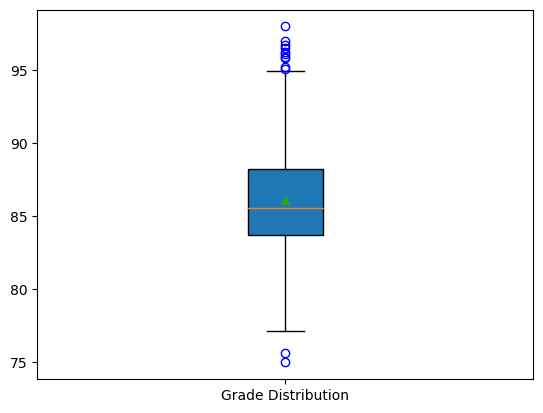

In [5]:
# Question: Is there some correlation between higher average grade and going to college

# Seperate the data into quartiles and find the frequency of each portion

# Factors to consider, Parent salary, Average grades, type of school and Gender

# Plan: Use logistic regression to determine which factor has the highest correlation

avg_grades = col_interest['average_grades']
will_college = col_interest['will_go_to_college']


avg_grade_median = col_interest['average_grades'].median()

avg_q1 = col_interest.loc[avg_grades < avg_grades.quantile(0.25)]
avg_q3 = col_interest.loc[avg_grades > avg_grades.quantile(0.75)]
print(avg_q1['will_go_to_college'].sum() / len(avg_q1['will_go_to_college']))
print(avg_q3['will_go_to_college'].sum() / len(avg_q3['will_go_to_college']))
print(avg_grade_median)

plt.boxplot(avg_grades, showmeans=True, labels=['Grade Distribution'], patch_artist=True, flierprops=dict(color='blue', markeredgecolor='blue'))

print("92% of students with an average grade higher than 85.57 went to college")
print("Only 28% of students with an average grade below 85.57 went to college")

In [23]:
# What is the likelihood of a persons interest related to them going to college
interested = col_interest.loc[col_interest['interest'].isin(['Very Interested','Less Interested', 'Interested'])]['will_go_to_college'].sum() / len(col_interest)
not_interested = col_interest.loc[col_interest['interest'] == 'Not Interested']['will_go_to_college'].sum() / len(col_interest)
uncertain = col_interest.loc[col_interest['interest'] == 'Uncertain']['will_go_to_college'].sum() / len(col_interest)
print(interested)
chart = pd.DataFrame({"interest": ["Interested", "Not Interested", "Uncertain"], "Percentage in college": [interested, not_interested, uncertain]})
display(chart)

0.296


,interest,Percentage in college
0,Interested,0.296
1,Not Interested,0.046
2,Uncertain,0.158


In [7]:
# Is there a relation between the sentiment on college and standardized test related subreddits and a students decision to go to college

# Compare the sentiment of the above data set with the attitudes of r/Sat
# If students are more likely to go to college if interested see the sentiment of r/SAT

import ast
text_df = pd.read_csv('Sat.csv')

sia = SentimentIntensityAnalyzer()

scores = []
# Take a random sample of 1000 posts
for post in text_df['tokens'].sample(1000):
    scores.append(sia.polarity_scores(' '.join(ast.literal_eval(post))))

scores



[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.024, 'neu': 0.897, 'pos': 0.08, 'compound': 0.5106},
 {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.802},
 {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.5267},
 {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'compound': 0.0772},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.7096},
 {'neg': 0.103, 'neu': 0.551, 'pos': 0.346, 'compound': 0.8658},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.032, 'neu': 0.866, 'pos': 0.102, 'compound': 0.8225},
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296},
 {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7003},
 {'neg': 0.025, 'neu': 0.946, 'pos': 0.029, 'compound': 0.1027},
 {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249},
 {'neg': 0.076, 'neu':